In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Read this First

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

### **Binary Images**

**For these exercises, please download the 'binary_objects.png' image and the 'binary_operations.png' image from the same GitHub folder. We will be doing some operations on them.**

**First, we'll see how we can change an image into a binary image.**

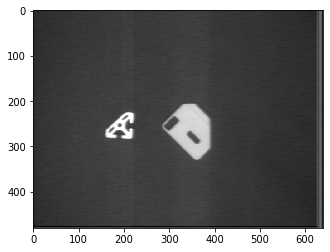

In [2]:
import cv2
original_image = cv2.imread('binary_objects.png')
grayscale = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap='gray')

**Binary images by definition only have two pixel values, 255 or 0. Convert the grayscaled image into a binary image by setting all pixels greater than 125 in value to 255. Feel free to do it both using masking, or using cv2's threshold operation.**

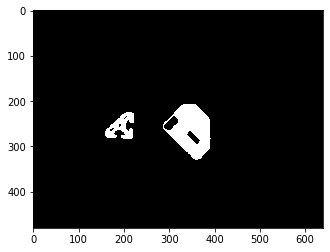

In [81]:
ret, binary_img = cv2.threshold(original_image, 125, 255, cv2.THRESH_BINARY)
plt.imshow(binary_img, cmap='gray')

**We now have some binary images, with pixels where the object is set to 255, and non-object pixels set to 0. Before we can do processing on each object individually, we have to separate them.**

**Use OpenCV's connectedComponents to separate out the different objects. Plot the image with a different pixel value for each object.**

(480, 640)


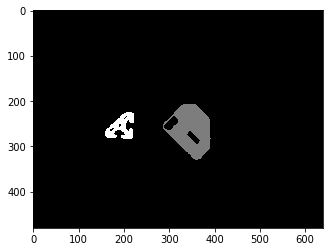

In [63]:
ret, marker = cv2.connectedComponents(binary_img[:,:,0])
print(marker.shape)

marked_img = binary_img.copy()
marked_img[marker == 0] = 0
marked_img[marker == 1] = 125
marked_img[marker == 2] = 255

plt.imshow(marked_img, cmap='gray')



**Now that each object detected has a unique pixel value, separate the objects from each other in the image. That is, create an image where we only have the first object present, and create a second image where we only have the second object present. Plot them side by side.**

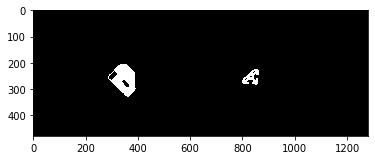

In [64]:
first_obj = np.zeros(marker.shape)
second_obj = np.zeros(marker.shape)

first_obj[marker == 1] = 255
second_obj[marker == 2] = 255

plt.imshow(np.hstack((first_obj, second_obj)), cmap='gray')

**Now, find the area of each of the objects in the image. You should be getting around 7691 for one object and 2064 for the other. Print out the results.**

In [65]:
area_1 = np.count_nonzero(first_obj)
area_2 = np.count_nonzero(second_obj)
print(area_1, area_2)

7691 2064


**Another interesting we can do is to find the center of mass of the object itself. This is simply done by averaging the x and y coordinates of all of the pixels of that object. Compute the center of mass for the objects and print them.**

In [142]:
X_arr = np.arange(binary_img.shape[1]).reshape(1, -1).repeat(binary_img.shape[0], axis=0)
Y_arr = np.arange(binary_img.shape[0]).reshape(-1, 1).repeat(binary_img.shape[1], axis=1)

print(X_arr.shape, Y_arr.shape, binary_img.shape)
print(X_arr[:5, :5])
print(Y_arr[:5, :5])

x_com_1 = np.sum(X_arr * first_obj)/np.sum(first_obj)
y_com_1 = np.sum(Y_arr * first_obj)/np.sum(first_obj)

x_com_2 = np.sum(X_arr * second_obj)/np.sum(second_obj)
y_com_2 = np.sum(Y_arr * second_obj)/np.sum(second_obj)


print("COM 1: (X, Y): ({:.2f},{:.2f})".format(x_com_1, y_com_1))
print("COM 2: (X, Y): ({:.2f},{:.2f})".format(x_com_2, y_com_2))


(480, 640) (480, 640) (480, 640, 3)
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
COM 1: (X, Y): (349.24,263.58)
COM 2: (X, Y): (195.31,256.61)


**Now, using cv2.circle(), plot the centers of the objects as a red circle (of a reasonable radius) onto the original coloured images, and verify that this visually makes sense.**

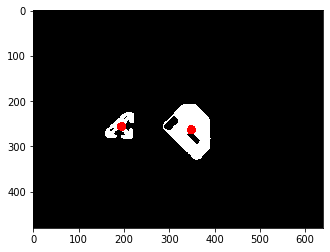

In [102]:
com_img = cv2.circle(binary_img.copy(), (int(x_com_2), int(y_com_2)), 10, (255, 0, 0), -1)
com_img = cv2.circle(com_img, (int(x_com_1), int(y_com_1)), 10, (255, 0, 0), -1)
plt.imshow(com_img)

### **Binary Morphology**

**Now we'll do some simple exploration with binary morphological operations. First load the 'binary_operations.png' image.**

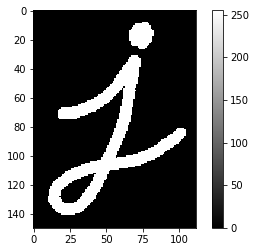

In [103]:
binary_image = cv2.imread('binary_operations.png', 0)
plt.imshow(binary_image, cmap='gray')
plt.colorbar()

**We'll first do some simple binary erosion. Create a 5x5 kernel of ones, with dtype=uint8. Then, using OpenCV's cv2.erode(), perform binary erosion with the binary image. Plot the results.**

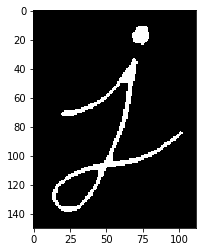

In [108]:
kernel = np.ones((5,5))
erosion = cv2.erode(binary_image, kernel)
plt.imshow(erosion, cmap='gray')

**Now, using the same kernel, perform binary dilation on the original image, using cv2.dilate. Plot the results.**

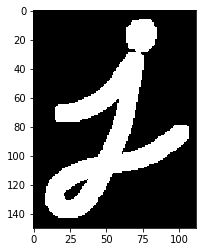

In [109]:
dilation = cv2.dilate(binary_image, kernel)
plt.imshow(dilation, cmap='gray')

**Subtract the eroded image from the dilated image, and then plot it.**

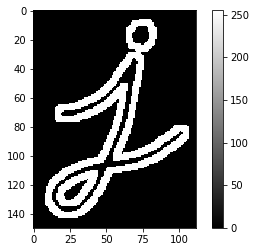

In [110]:
plt.imshow(dilation - erosion, cmap='gray')
plt.colorbar()

**Is this what you expected?**

Yes, it is the part of the line that was exanded and removed. It removes the inner portion of the letter

**Now we want to see what happens when we do binary erosion and dilation in succession. Create a new image that is a copy of the original binary image, but with around 1% of the pixels randomly flipped.**

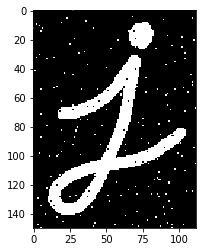

In [171]:
import random

def flip_pct(x, p):
    rand_samp = random.uniform(0, 1)
    y = x
    if rand_samp <= p:
        if x == 0:
            y = 255
            
        # if
        
        else:
            y = 0
            
        # else
    # if
    
    return y

# flip_1pct
vflip_pct = np.vectorize(flip_pct)
noisy_img = vflip_pct(binary_image.copy(), 0.01)

plt.imshow(noisy_img, cmap='gray')

**Now, using the same 5x5 kernel, perform binary erosion on the image with random pixels flipped. Plot the result.**

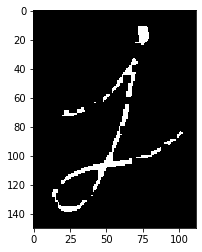

In [172]:
kernel = np.ones((5,5))
erosion2 = cv2.erode(noisy_img, kernel)
plt.imshow(erosion2, cmap='gray')

**What do you notice? Is this what you expect?**

The image is blotchy now. It is missing points.

**Now apply binary dilation to the eroded image above, and plot the result.**

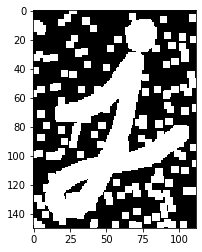

In [173]:
dilation2 = cv2.dilate(noisy_img, kernel)
plt.imshow(dilation2, cmap='gray')

**This is binary opening, where we use erosion followed by dilation. Is this what you expected? When do we want to use binary opening?**

The gaps were filled but the random noise has been enlarged.

**Let's do the same thing, but now first with dilation then erosion. Here, perform binary dilation using the image with the pixels flipped and the same 5x5 kernel. Plot the results.**

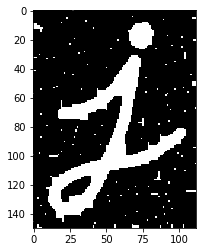

In [174]:
dilate_erode = cv2.erode(dilation2, kernel)
plt.imshow(dilate_erode, cmap='gray')

**What do you notice? Is this what you expected?**

It looks closer to what the original image was, but with some noise

**Now apply binary erosion to the image above, and plot the results.**

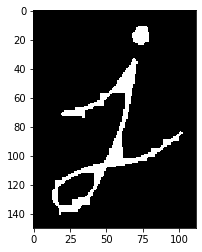

In [175]:
dilate_erode2 = cv2.erode(dilate_erode, kernel)
plt.imshow(dilate_erode2, cmap='gray')

**This is binary closing, where we use dilation followed by erosion. Is this what you expected? When do we want to use binary closing?**

Yes, the holes in the iamge have been filled and we eroded all of the other noise out.